In [1]:
from matplotlib.pyplot import grid
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
import xgboost as xg
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

## Reading Data

In [70]:
Data = pd.read_csv('train_reg.csv')
TestData = pd.read_csv('test_reg.csv')

In [71]:
Data['Date']=pd.to_datetime(Data['Date'])

#Breaking Down the Date into 3 Components
Data['Day']=Data['Date'].dt.day
Data['Month']=Data['Date'].dt.month
Data['Year']=Data['Date'].dt.year

TestData['Date']=pd.to_datetime(TestData['Date'])

#Breaking Down the Date into 3 Components
TestData['Day']=TestData['Date'].dt.day
TestData['Month']=TestData['Date'].dt.month
TestData['Year']=TestData['Date'].dt.year
#print(Data.head())

## PreProcessing

In [57]:
Encoding = LabelEncoder()
New_Seasons = ['Summer', 'Spring', 'Winter', 'Autumn']
N = Encoding.fit(New_Seasons)
Data['Seasons'] = Data['Seasons'].map({'Winter':0, 'Spring': 1, 'Summer' : 2, 'Autumn':3})
TestData['Seasons'] = TestData['Seasons'].map({'Summer' : 2, 'Autumn':3})
Data['Holiday'] = Data['Holiday'].map({'Holiday':0, 'No Holiday': 1})
TestData['Holiday'] = TestData['Holiday'].map({'Holiday':0, 'No Holiday': 1})
Data['Functioning Day'] = Data['Functioning Day'].map({'No':0, 'Yes': 1})
TestData['Functioning Day'] = TestData['Functioning Day'].map({'No':0, 'Yes': 1})

In [7]:
sns.countplot(Data['Functioning Day'],palette='pastel').set_title('Rented Bike count according to Functioning Day')
sns.countplot(Data['Holiday'],palette='pastel').set_title('Rented Bike count according to Holiday')

In [67]:

fig = plt.figure(figsize=(30,30), dpi = 480)
dataplot = sns.heatmap(Data.corr(), annot=True, fmt = '.2f')
plt.show()


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


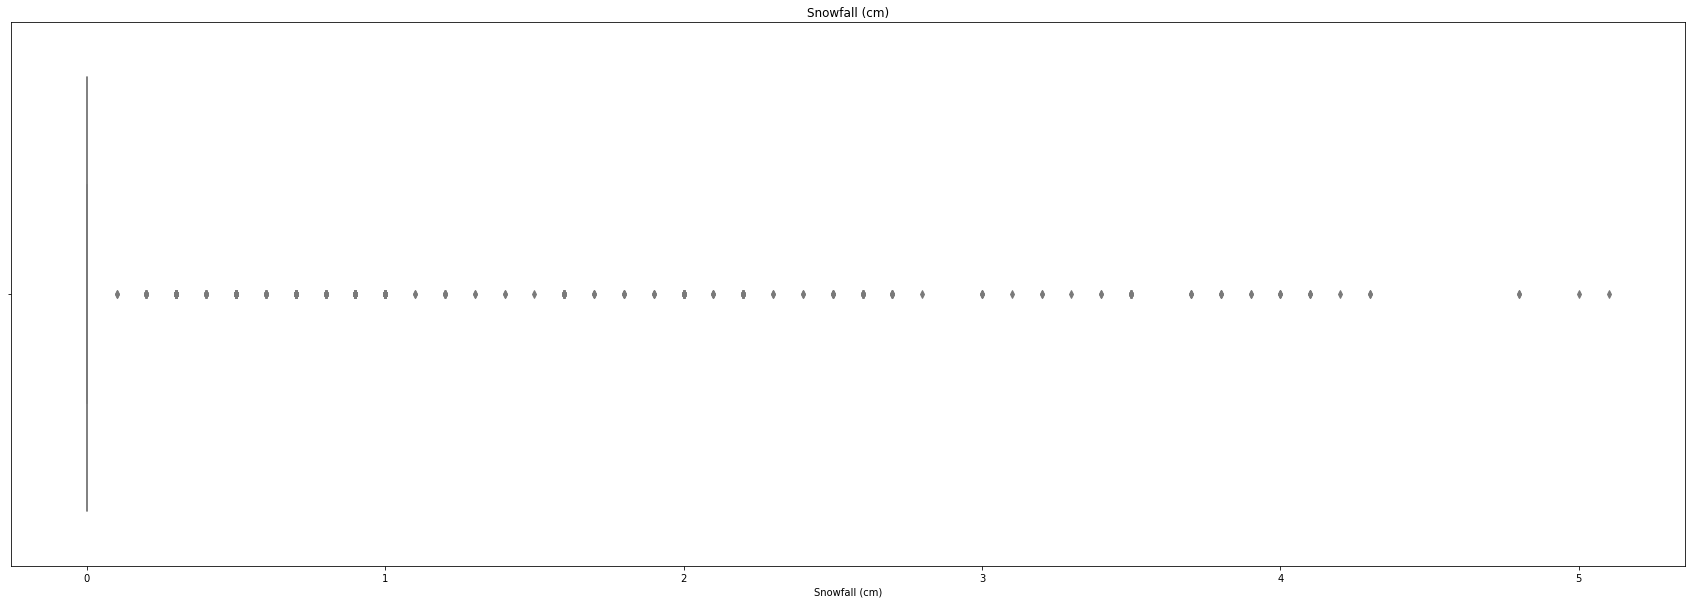

In [81]:
plt.figure(figsize=(30, 10))
sns.boxplot(Data['Snowfall (cm)'],palette='pastel').set_title('Snowfall (cm)')
plt.show()

In [58]:
Data['Rainfall(mm)']=Data['Rainfall(mm)'].apply(lambda x:1 if x>0 else 0)
Data['Solar Radiation (MJ/m2)']=Data['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x> 0 else 0)

In [59]:
XTrain = Data.drop(['Rented Bike Count', 'Date'], axis = 1)
YTrain = Data['Rented Bike Count']
XTest = TestData.drop(['ID', 'Date'], axis = 1)
#XTrain = np.array(XTrain)
print(XTrain.shape)
print(YTrain.shape)
print(XTest.shape)

(6000, 15)
(6000,)
(2760, 15)


In [ ]:

Norm = MinMaxScaler()
Norm.fit(XTrain)
XTrain = Norm.transform(XTrain)
XTest = Norm.transform(XTest)


In [63]:
XTrain,XVal,YTrain,YVal=train_test_split(XTrain,YTrain,test_size=0.3,random_state=12)

## Linear Regression

In [21]:
Model = LinearRegression()
Model.fit(XTrain, YTrain)

LinearRegression()

In [22]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

424.9912564332049


In [23]:
YTest = Model.predict(XTest)
print(YTest)

[ 931.10622961  898.10716001  903.17177823 ... 1087.68900184 1102.86631671
 1119.99895949]


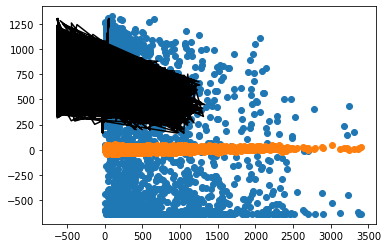

In [24]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

## Lasso Regrssion

In [25]:
Model = Lasso(alpha=0.001)
Model.fit(XTrain, YTrain)

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.308e+07, tolerance: 1.712e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.001)

In [26]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

424.99084887673996


In [27]:
YTest = Model.predict(XTest)
print(YTest)

[ 931.10000937  898.10212101  903.16448662 ... 1087.67116661 1102.84634966
 1119.97905272]


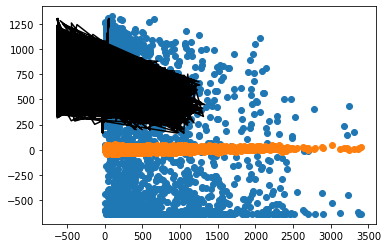

In [28]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

## Ridge Regression

In [29]:
Model = Ridge(alpha=0.001)
Model.fit(XTrain, YTrain)

Ridge(alpha=0.001)

In [30]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

424.99122204225324


In [31]:
YTest = Model.predict(XTest)
print(YTest)

[ 931.10556887  898.10657138  903.17104829 ... 1087.68918263 1102.86636653
 1119.99897973]


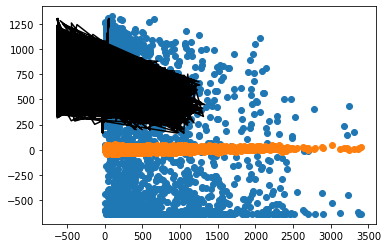

In [32]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

## RandomForestRegressor

In [34]:
#from sklearn.linear_model import LogisticRegression
Model = RandomForestRegressor(max_depth=15, n_estimators=20, random_state=1000)
Model.fit(XTrain, YTrain)

RandomForestRegressor(max_depth=15, n_estimators=20, random_state=1000)

In [35]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

227.0007579360959


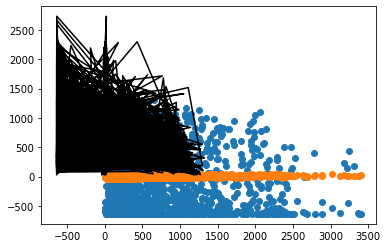

In [36]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

## Decision Tree Regressor

In [82]:
Model = DecisionTreeRegressor(max_depth=20)
Model.fit(XTrain, YTrain)

DecisionTreeRegressor(max_depth=20)

In [83]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

290.6779233371332


In [39]:
YTest = Model.predict(XTest)
print(YTest)

[875. 718. 656. ... 460. 460. 361.]


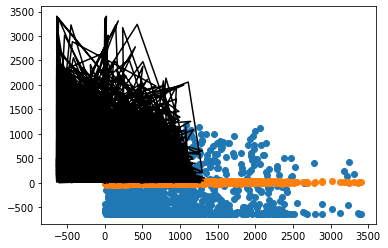

In [40]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

## XGB Regressor

In [41]:
x = xg.XGBRFRegressor(random_state=0)
XG_Params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
gs_rf = GridSearchCV(x,XG_Params,cv=3)
gs_rf.fit(XTrain, YTrain)
X = gs_rf.best_params_
XG = xg.XGBRFRegressor(n_estimators=X['n_estimators'],max_depth=X['max_depth'],min_samples_leaf=X['min_samples_leaf'],random_state=0)
Model = XG.fit(XTrain,YTrain)
Model.fit(XTrain, YTrain)

[05:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be 

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
               min_child_weight=1, min_samples_leaf=2, missing=nan,
               monotone_constraints='()', n_estimators=125, n_jobs=0,
               num_parallel_tree=125, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               sampling_method='uniform', ...)

In [42]:
Model = xg.XGBRFRegressor(reg_alpha=0.001)
Model.fit(XTrain, YTrain)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0.001, sampling_method='uniform', scale_pos_weight=1, ...)

In [43]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

280.4579815703439


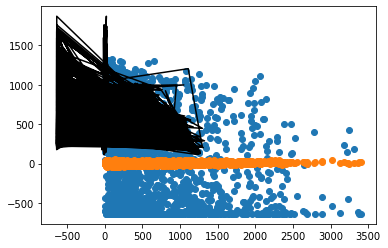

In [44]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

## ADABoost Regressor

In [46]:
print(XTrain.shape)
ad = AdaBoostRegressor(base_estimator=RandomForestRegressor(), random_state=0)
Model = ad.fit(XTrain, YTrain)
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

(4200, 15)
219.2548498404438


In [47]:
YNew = Model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

219.2548498404438


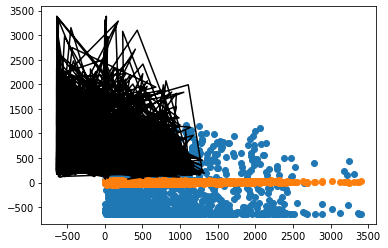

In [48]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
Model.fit(X, Y)
plt.plot(X, Model.predict(X), color='k')
plt.show()

In [49]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(XTrain, YTrain)
YNew = model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

231.94291202554325


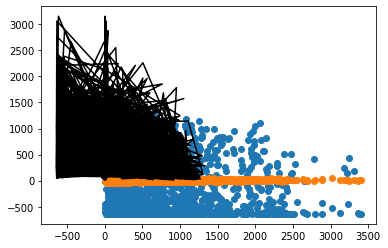

In [50]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
model.fit(X, Y)
plt.plot(X, model.predict(X), color='k')
plt.show()

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(XTrain, YTrain)
YNew = model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

238.64937093383054


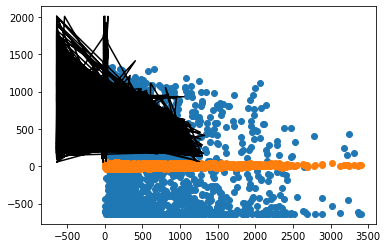

In [52]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
plt.figure(2)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
model.fit(X, Y)
plt.plot(X, model.predict(X), color='k')
plt.show()

In [64]:
print(XTrain.shape)
import lightgbm as lgb
train_data=lgb.Dataset(XTrain,label=YTrain)
params = {
              'learning_rate': 0.01,
              
              }
model= lgb.train(params, train_data, 3000)
YNew = model.predict(XVal)
print(np.sqrt(mean_squared_error(YVal, YNew)))

(4200, 15)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 4200, number of used features: 15
[LightGBM] [Info] Start training from score 641.985476
211.06999923611912


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 2
[LightGBM] [Info] Start training from score 652.800000


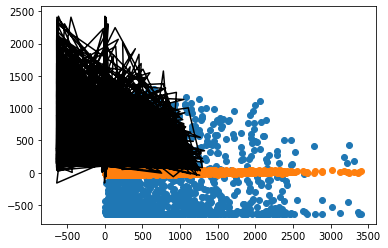

In [66]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Y = np.array(YVal)
X = np.array(X_train2)
train_data=lgb.Dataset(X,label=Y)
params = {
              'learning_rate': 0.01,
              
              }
model= lgb.train(params, train_data, 3000)
plt.scatter(Y, X[:,0])
plt.scatter(Y, X[:,1])
plt.plot(X, model.predict(X), color = 'k')
plt.show()